### Resampling time series data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [84]:
df = pd.read_csv("Data/chemical-concentration-readings.csv", parse_dates=True, index_col=0)
df.head()

,Chemical conc.
Timestamp,
1975-01-01 00:00:00,17.0
1975-01-01 02:00:00,16.6
1975-01-01 04:00:00,16.3
1975-01-01 06:00:00,16.1
1975-01-01 08:00:00,17.1


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197 entries, 1975-01-01 00:00:00 to 1975-01-17 08:00:00
Data columns (total 1 columns):
Chemical conc.    197 non-null float64
dtypes: float64(1)
memory usage: 3.1 KB


In [86]:
#Resample and compute daily mean
daily = df['Chemical conc.'].resample('D')
daily_mean = daily.mean()

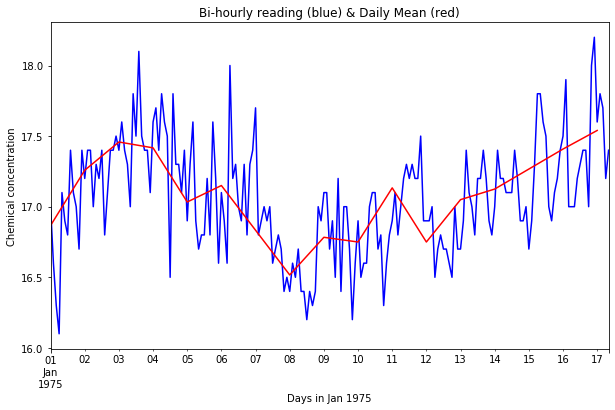

In [87]:
#Plot original time series and daily mean
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)

df['Chemical conc.'].plot(ax=ax, color='b')
daily_mean.plot(ax=ax, color='r')

ax.set_title('Bi-hourly reading (blue) & Daily Mean (red)')
ax.set_xlabel('Days in Jan 1975')
ax.set_ylabel('Chemical concentration')

plt.show()

### Group wise aggregation

In [88]:
df= pd.read_csv("Data/mean-daily-temperature-fisher-river.csv", parse_dates=["Date"])
df.head()

,Date,Mean temparature
0,1988-01-01,-23.0
1,1988-01-02,-20.5
2,1988-01-03,-22.0
3,1988-01-04,-30.5
4,1988-01-05,-31.0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
Date                1461 non-null datetime64[ns]
Mean temparature    1461 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB


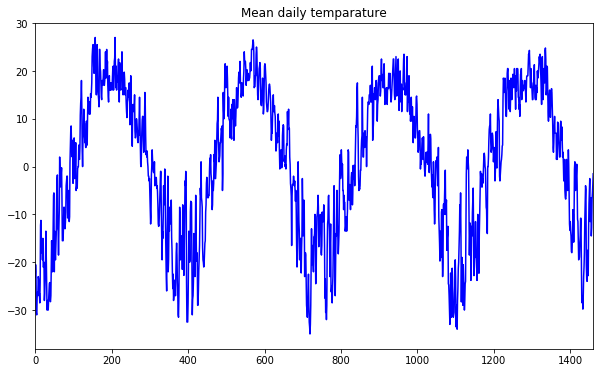

In [90]:
#Plot original time series on daily mean temparature
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)

df['Mean temparature'].plot(ax=ax, color='b')

ax.set_title('Mean daily temparature')

plt.show()

In [91]:
df['Month_Year'] = df["Date"].dt.strftime('%m-%Y')
df.set_index("Date", inplace=True)
df

,Mean temparature,Month_Year
Date,,
1988-01-01,-23.0,01-1988
1988-01-02,-20.5,01-1988
1988-01-03,-22.0,01-1988
1988-01-04,-30.5,01-1988
1988-01-05,-31.0,01-1988
...,...,...
1991-12-27,-12.8,12-1991
1991-12-28,-6.8,12-1991
1991-12-29,-5.5,12-1991


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 1988-01-01 to 1991-12-31
Data columns (total 2 columns):
Mean temparature    1461 non-null float64
Month_Year          1461 non-null object
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [93]:
#Calculate month wise statistics
monthly_stats = df.groupby('Month_Year')['Mean temparature'].aggregate([np.mean, np.median, np.std])

monthly_stats.head()

,mean,median,std
Month_Year,,,
01-1988,-22.137097,-23.0,5.260640
01-1989,-17.129032,-18.0,8.250725
01-1990,-15.112903,-12.0,6.606764
01-1991,-23.038710,-24.5,7.095570
02-1988,-19.025862,-19.5,8.598522


In [94]:
#Let's create month and year columns and sort by them to reorder the rows
monthly_stats['Year'] = monthly_stats.index.map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%Y'))
monthly_stats['Month'] = monthly_stats.index.map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%m'))

monthly_stats.sort_values(by=['Year', 'Month'], inplace=True)
monthly_stats.head(10)

,mean,median,std,Year,Month
Month_Year,,,,,
01-1988,-22.137097,-23.000,5.260640,1988,01
02-1988,-19.025862,-19.500,8.598522,1988,02
03-1988,-8.258065,-9.250,5.341459,1988,03
04-1988,2.641667,1.875,5.057720,1988,04
05-1988,11.290323,11.000,6.254364,1988,05
06-1988,19.291667,19.000,3.909032,1988,06
07-1988,19.048387,18.500,3.073692,1988,07
08-1988,17.379032,18.000,3.183205,1988,08
09-1988,10.675000,10.750,3.880294,1988,09


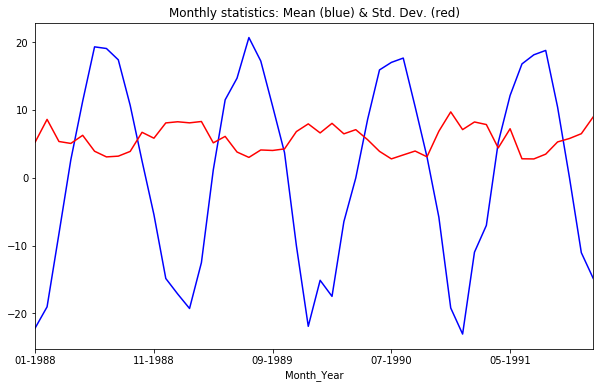

In [95]:
#Plot original time series and daily mean
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)

monthly_stats['mean'].plot(ax=ax, color='b')
monthly_stats['std'].plot(ax=ax, color='r')

ax.set_title('Monthly statistics: Mean (blue) & Std. Dev. (red)')

plt.show()

### Moving statistics

In [96]:
#Now we will calculate weekly moving average on the original time series of mean daily temparature
weekly_moving_average = df['Mean temparature'].rolling(7).mean()

In [97]:
#Now we will calculate monthly moving average on the original time series of mean daily temparature
monthly_moving_average = df['Mean temparature'].rolling(30).mean()

In [98]:
#Let's caluclate the weekly and monthly avergaes with a stride of length 2
weekly_moving_average_2stride = df['Mean temparature'].rolling(7).mean()[::2]
monthly_moving_average_2stride = df['Mean temparature'].rolling(30).mean()[::2]

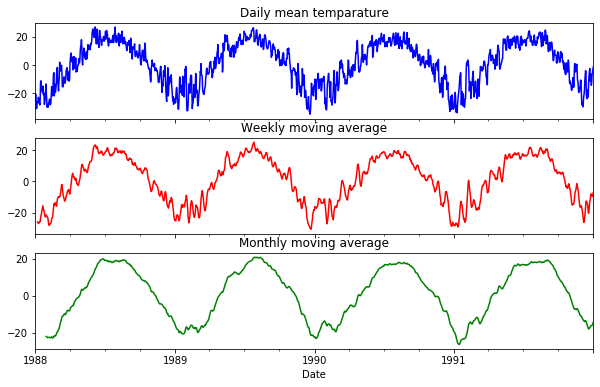

In [99]:
#Plot original time series and weekly moving average
fig, axarr = plt.subplots(3, sharex=True)
fig.set_size_inches(10, 6)

df['Mean temparature'].plot(ax=axarr[0], color='b')
axarr[0].set_title('Daily mean temparature')

weekly_moving_average.plot(ax=axarr[1], color='r')
axarr[1].set_title('Weekly moving average')

monthly_moving_average.plot(ax=axarr[2], color='g')
axarr[2].set_title('Monthly moving average')

plt.show()

## Differencing
The basic idea of differencing is taking differences between successive occurrences of the
time series Δxt = xt - xt-1 such that Δxt have constant mean and variance and hence can be
treated as a stationary series

### First-order differencing
First order differencing implies taking differences between successive realizations of the
time series so that the differences Δxt are irregular variations free from any long run trend
or seasonality. The random walk model discussed in the last chapter is a sum of subsequent
random variations and is given by xt = xt-l + Єt where Єt is a zero mean random number from
normal distribution. Random walks are characterized by long sequence of upward or
downward trends. Besides, they take unforeseen changes in direction. Based on these
characteristics, random walks are non-stationary. However, the first differences (Δxt of a
random walk are equal to the random noise Єt. Hence the residuals remaining after firstorder
differencing of a random walk is a zero-mean stationary series.

the first-order differences are independent and identically distributed with a constant mean and a constant variance and hence have no autocorrelation.

In [104]:
djia_df = pd.read_excel('Data/DJIA_Jan2016_Dec2016.xlsx', parse_dates=True, index_col=0)
djia_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


In [105]:
djia_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [106]:
#We would be using the 'Close' values of the DJIA to illustrate Differencing
first_order_diff = djia_df['Close'].diff(1)

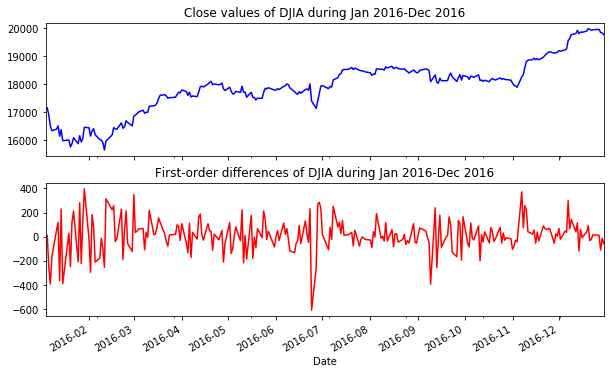

In [108]:
#Let us plot the original time series and first-differences
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(10, 6)

djia_df['Close'].plot(ax=ax[0], color='b')
ax[0].set_title('Close values of DJIA during Jan 2016-Dec 2016')

first_order_diff.plot(ax=ax[1], color='r')
ax[1].set_title('First-order differences of DJIA during Jan 2016-Dec 2016')

plt.show()

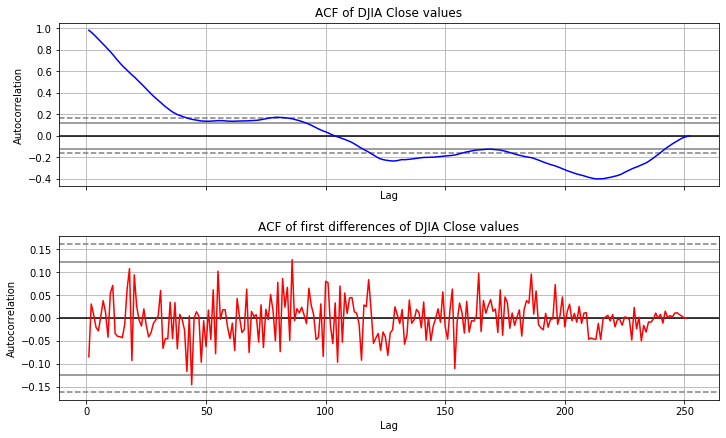

In [110]:
from pandas.plotting import autocorrelation_plot

#Let us plot the ACFs of original time series and first-differences
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(10, 6)

autocorrelation_plot(djia_df['Close'], color='b', ax=ax[0])
ax[0].set_title('ACF of DJIA Close values')

autocorrelation_plot(first_order_diff.iloc[1:], color='r', ax=ax[1])
ax[1].set_title('ACF of first differences of DJIA Close values')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

* A quick way to verify whether the first-order differencing has stationarized a time series is
to plot the ACF function and run the Ljung-Box test for the differenced series. The Ljung-
Box test determines if the observed auto-correlation is statistically significant. **The null
hypothesis of the Ljung-Box test is that the time series consist of random variations and
lacks predictable autocorrelation while the alternate hypothesis proposes that the observed
autocorrelation is not random.**

* Now we will perform the Ljung-Box test on the ACFs
of the original time series and the first-differences.
For running the test we will limit upto 20 lags

* Let us obtain the confidence intervls, Ljung-Box Q-statistics and p-values
for the original DJIA Close values

In [114]:
from statsmodels.tsa import stattools

acf_djia, confint_djia, qstat_djia, pvalues_djia = stattools.acf(djia_df['Close'],
                                                                 unbiased=True,
                                                                 nlags=20,
                                                                 qstat=True,
                                                                 alpha=0.05)

C:\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


* Let us check if at confidence level 95% (alpha=0.05)
if the null hypothesis is rejected at any of the lags

In [116]:
alpha = 0.05
for l, p_val in enumerate(pvalues_djia):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is rejected at lag = 0 for p-val = 1.0693767753675923e-55
Null hypothesis is rejected at lag = 1 for p-val = 9.994326469626719e-107
Null hypothesis is rejected at lag = 2 for p-val = 3.514318635466178e-156
Null hypothesis is rejected at lag = 3 for p-val = 8.306783142362536e-204
Null hypothesis is rejected at lag = 4 for p-val = 1.3385232646526703e-249
Null hypothesis is rejected at lag = 5 for p-val = 1.1920943365339414e-293
Null hypothesis is rejected at lag = 6 for p-val = 0.0
Null hypothesis is rejected at lag = 7 for p-val = 0.0
Null hypothesis is rejected at lag = 8 for p-val = 0.0
Null hypothesis is rejected at lag = 9 for p-val = 0.0
Null hypothesis is rejected at lag = 10 for p-val = 0.0
Null hypothesis is rejected at lag = 11 for p-val = 0.0
Null hypothesis is rejected at lag = 12 for p-val = 0.0
Null hypothesis is rejected at lag = 13 for p-val = 0.0
Null hypothesis is rejected at lag = 14 for p-val = 0.0
Null hypothesis is rejected at lag = 15 for p-val = 0.

* **The above results show statistically significant ACF in the original DJIA Close values**

* Let us obtain the confidence intervals, Ljung-Box Q-statistics and p-values for the differenced DJIA Close values

In [120]:
acf_first_diff, confint_first_diff, qstat_first_diff, pvalues_first_diff = stattools.acf(first_order_diff.iloc[1:],
                                                     unbiased=True,
                                                     nlags=20,
                                                     qstat=True,
                                                     alpha=0.05)

* Let us check if at confidence level of 95% (alpha = 0.05) if the null hypothesis is rejected at any of the lags

In [123]:
alpha = 0.05
for l, p_val in enumerate(pvalues_first_diff):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))
        

Null hypothesis is accepted at lag = 0 for p-val = 0.17569800898040225
Null hypothesis is accepted at lag = 1 for p-val = 0.3538300853009234
Null hypothesis is accepted at lag = 2 for p-val = 0.5531395640331849
Null hypothesis is accepted at lag = 3 for p-val = 0.6985127807558775
Null hypothesis is accepted at lag = 4 for p-val = 0.7891580120671382
Null hypothesis is accepted at lag = 5 for p-val = 0.8772903282781711
Null hypothesis is accepted at lag = 6 for p-val = 0.901277483583282
Null hypothesis is accepted at lag = 7 for p-val = 0.9429823162379645
Null hypothesis is accepted at lag = 8 for p-val = 0.9485916556521746
Null hypothesis is accepted at lag = 9 for p-val = 0.9377977943700336
Null hypothesis is accepted at lag = 10 for p-val = 0.8937612607433124
Null hypothesis is accepted at lag = 11 for p-val = 0.9152190930215198
Null hypothesis is accepted at lag = 12 for p-val = 0.9263245243892939
Null hypothesis is accepted at lag = 13 for p-val = 0.9350725554001179
Null hypothesis 

* The above results show that ACF is essentially random in the differenced DJIA Close values

### Second-order differencing
In some cases, first-order differencing does not stationarize the time series and therefore the
data is differenced another time to generate a stationary time series. Therefore, the secondorder
differenced time series is generated as follows:

$ x"_{t} = x'_{t} - x'_{t-1} = (x_{t} - x_{t-1}) - (x_{t-1} - x_{t-2}) = x_{t} - 2x_{t-1} + x_{t-2}$

The time series resulting from second-order differencing have N - 2 observations. It is almost never required to perform differencing of order higher than second order.

### Seasonal differencing
When a time series exhibits seasonality of a known time period of m time indices, it can be
stationarized by taking seasonal differences between xt and xt-m. These differences taken at
lags of length m are indicative of the seasons or quarters in a year. In this case m = 12 and
the differences are taken between original observations that are a year apart from each
other. The seasonal differences can be expressed as follows:

$ x'_{t} = x_{t} - x_{t-m} = Є_{t}$

* To demonstrate the effect of seasonal differencing we would revisit the time series on daily mean temperatures of Fisher River. We have already seen the original time series and the monthly mean, both of which apparently exhibit strong seasonal behavior. The autocorrelation in this series is computed and plotted using the `autocorrelation_plot` function from the pandas.plotting API and is shown in the following graph. The autocorrelation_plot function is useful to check the presence of statistically significant autocorrelation in a time series.

In [10]:
daily_temp= pd.read_csv("Data/mean-daily-temperature-fisher-river.csv", parse_dates=["Date"], index_col=0)
daily_temp.head()

,Mean temparature
Date,
1988-01-01,-23.0
1988-01-02,-20.5
1988-01-03,-22.0
1988-01-04,-30.5
1988-01-05,-31.0


In [12]:
#Calculate monthly mean temperature
monthly_mean_temp = daily_temp['Mean temparature'].resample('M').mean()

print('Shape of monthly mean temperature dataset:', monthly_mean_temp.shape)
monthly_mean_temp.head(10)

Shape of monthly mean temperature dataset: (48,)


Date
1988-01-31   -22.137097
1988-02-29   -19.025862
1988-03-31    -8.258065
1988-04-30     2.641667
1988-05-31    11.290323
1988-06-30    19.291667
1988-07-31    19.048387
1988-08-31    17.379032
1988-09-30    10.675000
1988-10-31     2.467742
Freq: M, Name: Mean temparature, dtype: float64

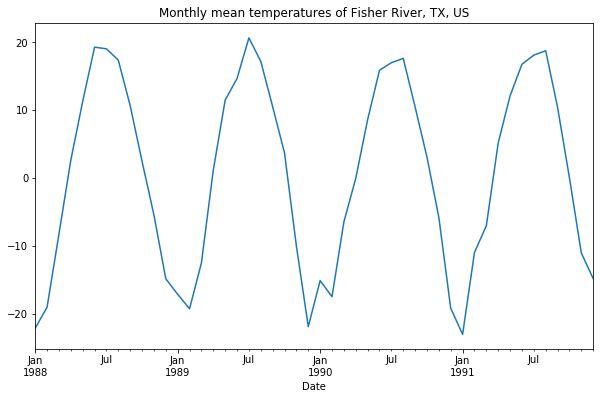

In [13]:
#Plot the monthly mean temparature
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)
ax.set_title('Monthly mean temperatures of Fisher River, TX, US')
monthly_mean_temp.plot(ax=ax)

plt.show()

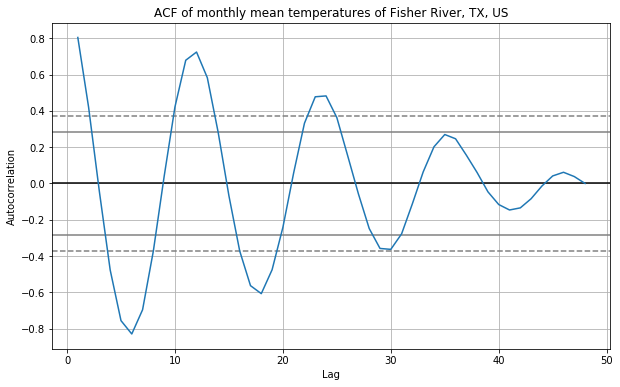

In [17]:
from pandas.plotting import autocorrelation_plot

#Plot ACF of the monthly mean temparature using pandas.tools.plotting.autocorrelation_plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of monthly mean temperatures of Fisher River, TX, US')
autocorrelation_plot(monthly_mean_temp, ax=ax)

plt.show()

* As shown in the following figure, it also plots the upper and lower confidence intervals for a confidence levels of 95% (alpha = 0.05; thick dotted line) and 99% (alpha = 0.01; thin dotted line). The ACF of the monthly mean temperature of Fisher River swings above and below the 99% confidence intervals for several lags. 

* The ACF of the monthly mean temperature of Fisher River swings above and below the 99% confidence intervals for several lags. **Therefore, the monthly mean temperatures form a non-stationary time series due to seasonality.**

* We attempt to stationarize the time series of monthly mean by taking seasonal differences.
The seasonal differencing leaves null values in its first 12 elements, which are removed before further analysis:

In [20]:
#Take seasonal differences with a period of 12 months on monthly mean temperatures
seasonal_diff = monthly_mean_temp.diff(12)
seasonal_diff = seasonal_diff[12:]

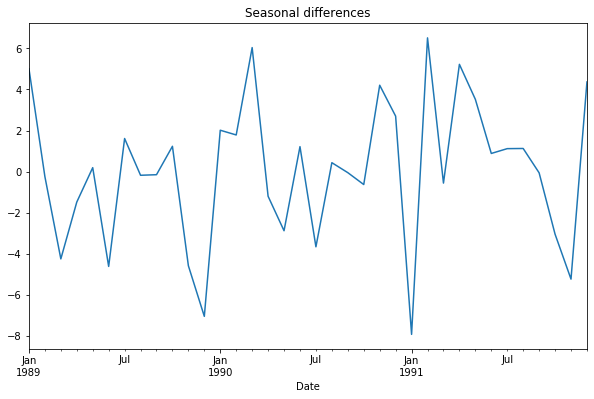

In [22]:
#Plot the seasonal differences
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)
ax.set_title('Seasonal differences')
seasonal_diff.plot(ax=ax)

plt.show()

* The seasonal differences appears to be random variations as shown in the above figure:

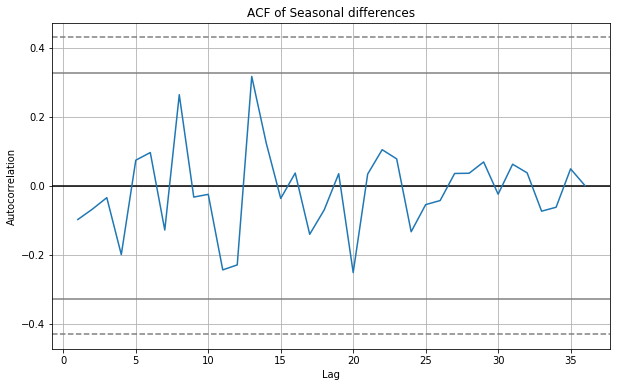

In [24]:
#Plot the seasonal differences
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of Seasonal differences')
autocorrelation_plot(seasonal_diff, ax=ax)

plt.show()

* We again use the autocorrelation_plot function to generate the ACF of the differenced
series and the confidence intervals at 99% of confidence level. We can see in the above figure that the ACF never crosses the 99% confidence intervals for lags varying from 0 to
over 35:

* The actual p-values are confirmed by running the stattools.acf function on the monthly
mean data as follows:

In [29]:
from statsmodels.tsa import stattools

#Perform Ljung-Box test on monthly mean temperature to get the p-values
#We will use lags of upto 10

_, _, _, pval_monthly_mean = stattools.acf(monthly_mean_temp, unbiased=True,
                                           nlags=10, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_monthly_mean<=0.05))

Null hypothesis is rejected for lags: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),)


C:\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


* The Ljung-Box test is performed on the seasonally differenced series as well:

In [31]:
#Perform Ljung-Box test on monthly mean temperature to get the p-values
#We will use lags of upto 10
_, _, _, pval_seasonal_diff = stattools.acf(seasonal_diff, unbiased=True,
                                            nlags=10, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_seasonal_diff<=0.05))

Null hypothesis is rejected for lags: (array([], dtype=int64),)


* There are no lags for which the null hypothesis of Ljung-Box’s test is rejected.

* At this point, it is important to note that in some cases a first-order differencing is done after running the seasonal differences to achieve stationarity in the transformed data. The resulting series $x"_{t}$   can be computed from the original as follows:

$x"_{t} = x'_{t} - x'_{t-1} = (x_{t} - x_{t-m}) - (x_{t-1} - x_{t-m-1})$

* The choice of a differencing strategy can be determined through exploratory data analysis like the ones described so far. However, when it is difficult to determine what transformations are required for stationarization, the ADF test is performed for a definitive guidance.

Source: Practical Time Series Analysis - Dr. Avishek Pal, Dr. PKS Prakash